# Project 1

- 다양한 알고리즘으로 모델 만들고 성능 평가
- 성능이 좋을 것으로 판단된 모델의 성능 튜닝
- 튜닝된 모델 성능 평가

In [1]:
# Library 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%config InlineBackend.figure_format='retina'

In [2]:
# data 불러오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/Carseats.csv'
data = pd.read_csv(path)

In [3]:
# 데이터 살펴보기
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
# 기초통계량 확인
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
# target 확인
target = 'Sales'

# x, y 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]

In [6]:
# 가변수화 : ShelveLoc, Education, Urban, US
dumm_cols = ['ShelveLoc', 'Education', 'Urban', 'US']

x = pd.get_dummies(data=x, columns=dumm_cols, drop_first=True)

x.head()

,CompPrice,Income,Advertising,Population,Price,Age,ShelveLoc_Good,ShelveLoc_Medium,Education_11,Education_12,Education_13,Education_14,Education_15,Education_16,Education_17,Education_18,Urban_Yes,US_Yes
0,138,73,11,276,120,42,0,0,0,0,0,0,0,0,1,0,1,1
1,111,48,16,260,83,65,1,0,0,0,0,0,0,0,0,0,1,1
2,113,35,10,269,80,59,0,1,0,1,0,0,0,0,0,0,1,1
3,117,100,4,466,97,55,0,1,0,0,0,1,0,0,0,0,1,1
4,141,64,3,340,128,38,0,0,0,0,1,0,0,0,0,0,1,0


In [7]:
# train, test 분리
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [8]:
# 정규화
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

#### 모델링

In [10]:
# Library 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import *

In [12]:
# 기록 저장용
result = {}

In [13]:
# Linear Regression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print('mae:', mean_absolute_error(y_test, y_pred))
print('r2:', r2_score(y_test, y_pred))

result['LinearRegression'] = r2_score(y_test, y_pred)

mae: 0.8416098802896118
r2: 0.865781991663677


In [15]:
# KNN
model = KNeighborsRegressor(n_neighbors=5)
model.fit(x_train_s, y_train)
y_pred = model.predict(x_test_s)

print('mae:', mean_absolute_error(y_test, y_pred))
print('r2:', r2_score(y_test, y_pred))

result['KNN'] = r2_score(y_test, y_pred)

mae: 1.8401833333333333
r2: 0.3164099528655834


In [16]:
# Decision Tree
model = DecisionTreeRegressor(max_depth=5, random_state=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print('mae:', mean_absolute_error(y_test, y_pred))
print('r2:', r2_score(y_test, y_pred))

result['Decision Tree'] = r2_score(y_test, y_pred)
result

mae: 1.9110944370982414
r2: 0.307084554928293


{'LinearRegression': 0.865781991663677,
 'KNN': 0.3164099528655834,
 'Decision Tree': 0.307084554928293}

In [20]:
# Random Forest
model = RandomForestRegressor(max_depth=5, random_state=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print('mae:', mean_absolute_error(y_test, y_pred))
print('r2:', r2_score(y_test, y_pred))

result['Random Forest'] = r2_score(y_test, y_pred)
result

mae: 1.3799522255378287
r2: 0.605314731843458


{'LinearRegression': 0.865781991663677,
 'KNN': 0.3164099528655834,
 'Decision Tree': 0.307084554928293,
 'Random Forest': 0.605314731843458}

In [21]:
# XGBoost
model = XGBRegressor(max_depth=5, random_state=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print('mae:', mean_absolute_error(y_test, y_pred))
print('r2:', r2_score(y_test, y_pred))

result['XGBoost'] = r2_score(y_test, y_pred)
result

mae: 1.317809865474701
r2: 0.6132773106430172


{'LinearRegression': 0.865781991663677,
 'KNN': 0.3164099528655834,
 'Decision Tree': 0.307084554928293,
 'Random Forest': 0.605314731843458,
 'XGBoost': 0.6132773106430172}

In [22]:
# LightGBM
model = LGBMRegressor(max_depth=5, random_state=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print('mae:', mean_absolute_error(y_test, y_pred))
print('r2:', r2_score(y_test, y_pred))

result['LightGBM'] = r2_score(y_test, y_pred)
result

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000093 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 359
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 18
[LightGBM] [Info] Start training from score 7.518000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

{'LinearRegression': 0.865781991663677,
 'KNN': 0.3164099528655834,
 'Decision Tree': 0.307084554928293,
 'Random Forest': 0.605314731843458,
 'XGBoost': 0.6132773106430172,
 'LightGBM': 0.6946417907320817}

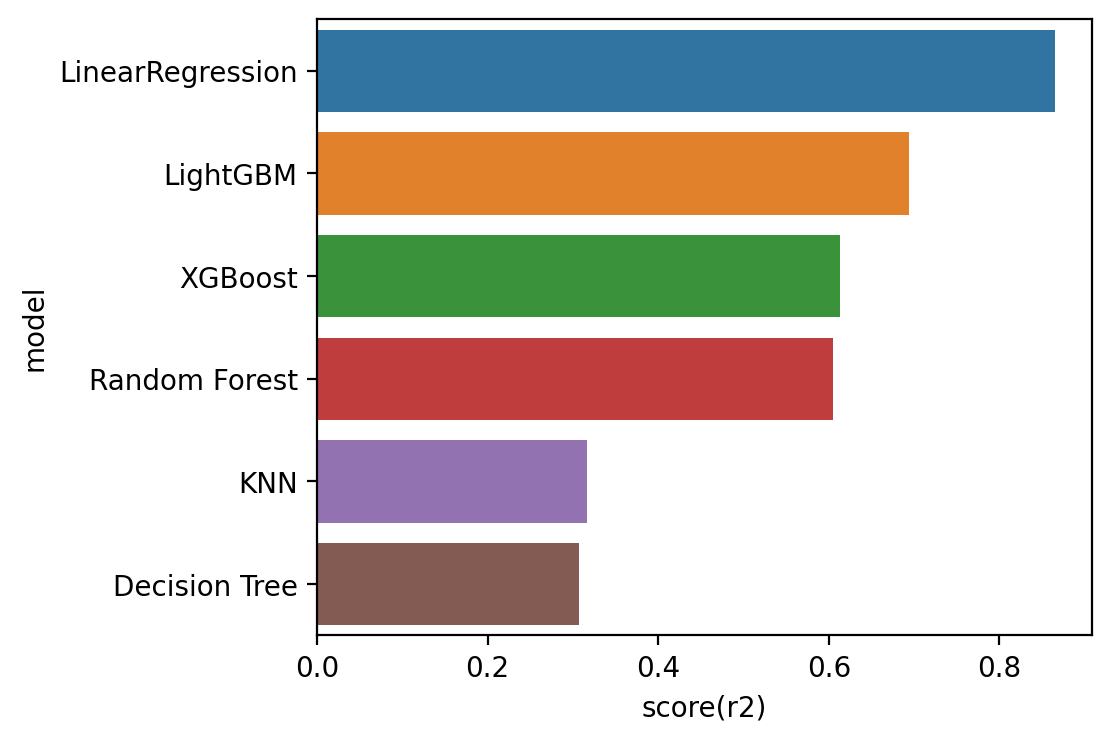

In [24]:
perf_dic = {'model': result.keys(), 'score(r2)': result.values()}
df = pd.DataFrame(perf_dic)
df.sort_values(by='score(r2)', ascending=False, inplace=True)

plt.figure(figsize=(5, 4))
sns.barplot(x=df['score(r2)'], y=df['model'])
plt.show()

- Linear Regression의 성능이 가장 높게 나타남
- 따로 튜닝할 필요 없이 그대로 사용하고 학습시키면 될 것 같다.